# Microcanonical ensemble - distinguishable particles
Authors: Livia Maskos, Professor Bart Hoogenboom

Outline:

- generate an animation with all possible configurations of a microcanonical ensemble for distinguisable particles (variables: lattice sites, particles)
- for a given 2D lattice: create plot (number of configurations against number of particles)
!!! next steps: animation coming + need to find a way of changing the for huge 'for' loop containing all the 'if', with the ability of changing the particles' color + create a box to ask for number of particles and lattice sites. Code becomes very long for 3+ particles considered.

Imports

In [1]:
!conda install -y -q ffmpeg

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import itertools
import matplotlib.animation as animation
from IPython.core.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations 

In [58]:
lat = 3 # saves the chosen values
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites
xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates
points = [*itertools.product(xi,yi)] #possible point coordinates
print('We consider a %d x %d lattice' %(lat, lat))

We consider a 3 x 3 lattice


### 1 particle per lattice site - Distinguishable particles

For 1 particle: 9
For 2 particles: 72
For 3 particles: 504


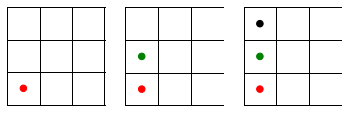

In [21]:
#all in one animation
all_configurations=[]
all_totalnum=[]

for P in [*range(1,4)]: # consider 1,2,3 particles
    particles = [*range(0, P)] 
    index = 0
    while index < P:
        particles[index] = points # coordinates of individual particles
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)] # coordinates of particles in configuration
    configuration=[]
    for elem in config:
        l = list(elem)
        configuration.append(l)
    totalnum = len(configuration) # number of possible configurations
    all_configurations.append(configuration)
    all_totalnum.append(totalnum)

    
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot()
ax2.plot()
ax3.plot()

ax1.axis('scaled')
ax2.axis('scaled')
ax3.axis('scaled')

        
def subplot1(): # set up case1
    ax1.axis('off')
    ax1.set_xlim(-0.5, M1+0.54)
    ax1.set_ylim(-0.54, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1.axvline(x=xc, color='black', linewidth=1)
        ax1.axhline(y=xc, color='black', linewidth=1)
    
def subplot2(): # set up case2
    ax2.axis('off')
    ax2.set_xlim(-0.5, M1+0.51)
    ax2.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2.axvline(x=xc, color='black', linewidth=1)
        ax2.axhline(y=xc, color='black', linewidth=1)
        
def subplot3(): # set up case2
    ax3.axis('off')
    ax3.set_xlim(-0.5, M1+0.51)
    ax3.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3.axvline(x=xc, color='black', linewidth=1)
        ax3.axhline(y=xc, color='black', linewidth=1)


configuration1=all_configurations[0] # possible configurations case1       
configuration2=all_configurations[1] # possible configurations case2 
configuration3=all_configurations[2] # possible configurations case3



totalnum1=all_totalnum[0] # multiplicity case1
totalnum2=all_totalnum[1] # multiplicity case2
totalnum3=all_totalnum[2] # multiplicity case3

print('For 1 particle:', totalnum1)
print('For 2 particles:', totalnum2)
print('For 3 particles:', totalnum3)

def animate1(frame):
    ax3.clear()
    subplot3()
    elem3 = configuration3[frame]
    colo = ['r', 'g', 'k']
    j = 0
    for t3 in elem3:
        circle = plt.Circle((t3[0], t3[1]) ,0.1 , color=colo[j])
        ax3.add_patch(circle) # plot particles
        j += 1
    ax2.clear()
    subplot2()
    elem2 = configuration2[int(frame/7)]
    i = 0
    for t2 in elem2:
        circle = plt.Circle((t2[0], t2[1]) ,0.1 , color=colo[i])
        ax2.add_patch(circle) # plot particles
        i += 1
    ax1.clear()
    subplot1()
    elem1 = configuration1[int(frame/56)]
    v = 0
    for t1 in elem1:
        circle = plt.Circle((t1[0], t1[1]) ,0.1 , color=colo[v])
        ax1.add_patch(circle) # plot particles
        v += 1

animation1 = animation.FuncAnimation(fig, animate1, frames=totalnum3, interval=120)
HTML(animation1.to_html5_video())

### 1 particle per lattice site - Indistinguishable particles

For 1 particle: 9
For 2 particles: 36
For 3 particles: 84


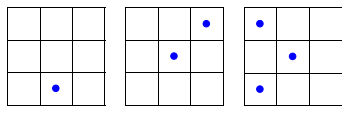

In [22]:
all_configurations_in=[]
all_totalnum_in=[]

for P in [*range(1,4)]: # consider 1,2,3 particles
    particles = [*range(0, P)] 
    index = 0
    while index < P:
        particles[index] = points # coordinates of individual particles
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)] # coordinates of particles in configuration
    list_form=[]
    for elem in config:
        l = list(elem)
        list_form.append(l)
    configuration_in = [list(e) for e in set(frozenset(d) for d in list_form)]
    total_in=len(configuration_in)
    all_configurations_in.append(configuration_in)
    all_totalnum_in.append(total_in)

fig_in, (ax1_in, ax2_in,ax3_in ) = plt.subplots(1,3)
ax1_in.plot()
ax2_in.plot()
ax3_in.plot()

ax1_in.axis('scaled')
ax2_in.axis('scaled')
ax3_in.axis('scaled')
        
def subplot1_in(): # set up case1
    ax1_in.axis('off')
    ax1_in.set_xlim(-0.5, M1+0.54)
    ax1_in.set_ylim(-0.54, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1_in.axvline(x=xc, color='black', linewidth=1)
        ax1_in.axhline(y=xc, color='black', linewidth=1)
    
def subplot2_in(): # set up case2
    ax2_in.axis('off')
    ax2_in.set_xlim(-0.5, M1+0.54)
    ax2_in.set_ylim(-0.53, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2_in.axvline(x=xc, color='black', linewidth=1)
        ax2_in.axhline(y=xc, color='black', linewidth=1)

def subplot3_in(): # set up case3
    ax3_in.axis('off')
    ax3_in.set_xlim(-0.5, M1+0.51)
    ax3_in.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3_in.axvline(x=xc, color='black', linewidth=1)
        ax3_in.axhline(y=xc, color='black', linewidth=1)


configuration1_in=all_configurations_in[0] # possible configurations case1       
configuration2_in=all_configurations_in[1] # possible configurations case2 
configuration3_in=all_configurations_in[2] # possible configurations case3


totalnum1_in=all_totalnum_in[0] # multiplicity case1
totalnum2_in=all_totalnum_in[1] # multiplicity case2
totalnum3_in=all_totalnum_in[2] # multiplicity case3
print('For 1 particle:',totalnum1_in)
print('For 2 particles:',totalnum2_in)
print('For 3 particles:',totalnum3_in)


def animate_in(frame):
    ax1_in.clear()
    subplot1_in()
    #ax1_in.set_title('Multiplicity 1 particle case on a 3x3 lattice')
    elem1_in = configuration1_in[int(frame/9.4)]
    for t1_in in elem1_in:
        circle = plt.Circle((t1_in[0], t1_in[1]) ,0.1 , color='b')
        ax1_in.add_patch(circle) # plot particles
    ax2_in.clear()
    subplot2_in()
    #ax2_in.set_title('Multiplicity 2 particles case on a 3x3 lattice')
    elem2_in = configuration2_in[int(frame/4)]
    for t2_in in elem2_in:
        circle = plt.Circle((t2_in[0], t2_in[1]) ,0.1 , color='b')
        ax2_in.add_patch(circle) # plot particles
    ax3_in.clear()
    subplot3_in()
    #ax3_in.set_title('Multiplicity 3 particles case on a 3x3 lattice')
    elem3_in = configuration3_in[frame]
    for t3_in in elem3_in:
        circle = plt.Circle((t3_in[0], t3_in[1]) ,0.1 , color='b')
        ax3_in.add_patch(circle) # plot particles


#print('The total number of configurations is %d' % totalnum1_in)
animation1_in = animation.FuncAnimation(fig_in, animate_in, frames=totalnum3_in, interval=360)
HTML(animation1_in.to_html5_video())

## Multiple particles per lattice site - Distinguishable particles

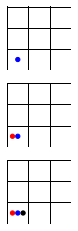

In [76]:
lat = 3 # saves the chosen values
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites

# Particle 1
start_part1 = -0.25
stop_part1 = M1
step_part = 1
float_range_array_part1 = np.arange(start_part1, stop_part1, step_part)
x_part1 = list(float_range_array_part1)
y_part = [*range(0,M1+1)] #possible y coordinates
points_part1 = [*itertools.product(x_part1,y_part)] #possible point coordinates
#print(points_part1)
# Particle 2
x_part2 = [*range(0,M1+1)] #possible x coordinates
points_part2 = [*itertools.product(x_part2,y_part)] #possible point coordinates

# Particle 3
start_part3 = 0.25
stop_part3 = M1+1
float_range_array_part3 = np.arange(start_part3, stop_part3, step_part)
x_part3 = list(float_range_array_part3)
points_part3 = [*itertools.product(x_part3,y_part)] #possible point coordinates

points=[points_part2, points_part1, points_part3]
all_configurations_ls =[]
all_totalnum_ls =[]
for P in [*range(1,4)]: # consider 1,2,3 particles
    particles = [*range(0, P)] 
    index = 0
    while index < P:
        particles[index] = points[index] # coordinates of individual particles
        index = index + 1
    config = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration
    configuration=[]
    for elem in config:
        l = list(elem)
        configuration.append(l)
    totalnum = len(configuration)
    all_configurations_ls.append(configuration)
    all_totalnum_ls.append(totalnum)

fig1_ls, (ax1_ls, ax2_ls, ax3_ls) = plt.subplots(3)
ax1_ls.plot()
ax2_ls.plot()
ax3_ls.plot()

ax1_ls.axis('scaled')
ax2_ls.axis('scaled')
ax3_ls.axis('scaled')

        
def subplot1_ls(): # set up case1
    ax1_ls.axis('off')
    ax1_ls.set_xlim(-0.5, M1+0.51)
    ax1_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1_ls.axvline(x=xc, color='black', linewidth=1)
        ax1_ls.axhline(y=xc, color='black', linewidth=1)
    
def subplot2_ls(): # set up case2
    ax2_ls.axis('off')
    ax2_ls.set_xlim(-0.5, M1+0.51)
    ax2_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2_ls.axvline(x=xc, color='black', linewidth=1)
        ax2_ls.axhline(y=xc, color='black', linewidth=1)

def subplot3_ls(): # set up case3
    ax3_ls.axis('off')
    ax3_ls.set_xlim(-0.5, M1+0.51)
    ax3_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3_ls.axvline(x=xc, color='black', linewidth=1)
        ax3_ls.axhline(y=xc, color='black', linewidth=1)


configuration1_ls=all_configurations_ls[0] # possible configurations case1       
configuration2_ls=all_configurations_ls[1] # possible configurations case2 
configuration3_ls=all_configurations_ls[2] # possible configurations case3


totalnum1_ls=all_totalnum_ls[0] # multiplicity case1
totalnum2_ls=all_totalnum_ls[1] # multiplicity case2
totalnum3_ls=all_totalnum_ls[2] # multiplicity case3


def animate1_ls(frame):
    ax1_ls.clear()
    subplot1_ls()
    elem1 = configuration1_ls[int(frame/81)]
    v = 0
    for t1_ls in elem1:
        colo = ['b', 'r']
        circle = plt.Circle((t1_ls[0], t1_ls[1]) ,0.1 , color=colo[v])
        ax1_ls.add_patch(circle) # plot particles
        v += 1
#def animate2_ls(frame):       
    ax2_ls.clear()
    subplot2_ls()
    elem2 = configuration2_ls[int(frame/9)]
    #print(elem2)
    i = 0
    for t2_ls in elem2:
        colo = ['b', 'r']
        circle = plt.Circle((t2_ls[0], t2_ls[1]) ,0.1 , color=colo[i])
        ax2_ls.add_patch(circle) # plot particles
        i += 1
#def animate3_ls(frame):        
    ax3_ls.clear()
    subplot3_ls()
    elem3 = configuration3_ls[frame]
    j = 0
    for t3_ls in elem3:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        ax3_ls.add_patch(circle) # plot particles
        j += 1

#print('The total number of configurations is %d' % totalnum1_ls)
#print('The total number of configurations is %d' % totalnum2_ls)
#print('The total number of configurations is %d' % totalnum3_ls)
animation1_ls = animation.FuncAnimation(fig1_ls, animate1_ls, frames=totalnum3_ls, interval=400)
HTML(animation1_ls.to_html5_video(1))


# STOP CODE

In [65]:
lat = 3 # saves the chosen values
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites

#shift1
start_part1 = -0.25
stop_part1 = M1
step_part = 1
float_range_array_part1 = np.arange(start_part1, stop_part1, step_part)
x_part1 = list(float_range_array_part1)
y_part = [*range(0,M1+1)] #possible y coordinates
points_part1 = [*itertools.product(x_part1,y_part)] #possible point coordinates
# shift2
start_part3 = 0.25
stop_part3 = M1+1
float_range_array_part3 = np.arange(start_part3, stop_part3, step_part)
x_part3 = list(float_range_array_part3)
points_part3 = [*itertools.product(x_part3,y_part)] #possible point coordinates

points=[points_part1, points_part3]

#print(points)
P = 2
particles = [*range(0, P)] 
index = 0
while index < P:
    particles[index] = points[index] # coordinates of individual particles
    index = index + 1
confshift = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration
confshifted=[]
for sh in confshift:
    l = list(sh)
    confshifted.append(l)
totalnum_norm = len(confshifted)
#print(confshifted)

##print('sep')

#newcoo=[]
#for shi in confshifted:
    #if shi[0]==shi[1]:
       # newcoo.append(shi)
#print(newcoo)

print('sep')

# Particle lambda
x_part = [*range(0,M1+1)] #possible x coordinates
y_part = [*range(0,M1+1)] #possible y coordinates
points_part = [*itertools.product(x_part,y_part)]
#print(points_part)
#print('kgkjgjgjh')
point_part=[]
for p in points_part:
    t = list(p)
    point_part.append(t)
#print(point_part)
#print('kjhgfjhvyfjh')
    
    

#x_n = [d - 0.25 for d in x_part]
#print(x_n)

P = 2
particles = [*range(0, P)] 
print('aaaaaa')
index = 0
while index < P:
    particles[index] = point_part # coordinates of individual particles
    index = index + 1
config_norm = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration
configuration_norm=[]
for elem2 in config_norm:
    l = list(elem2)
    configuration_norm.append(l)
totalnum_norm = len(configuration_norm)
#print(configuration_norm)

same=[]
diff=[]
for elem2 in configuration_norm:
    if elem2[0]==elem2[1]:
        same.append(elem2)
    else:
        diff.append(elem2)
print(same)
#print(diff)

print('and')

'''for v in same:
    print(v)
    print(v[0])
    print(v[1])
    for s in v:
        s[0] = s[0] - 0.25
        print(s)
    
print(same)'''

for v in same:
    #print(v)
    #print(v[0])
    #print(v[1])
    #print(v[0][0])
    #print(v[1][0])
    #v[0][0] = v[0][0] - 0.25
    #v[1][0] = v[1][0] + 0.25
    v[0][0] = [v[0][0] - 0.25 for v[0][0] in same]
    v[1][0] = [v[1][0] - 0.25 for v[1][0] in same]
    print(v[0][0])
    print(v[1][0])
print(same)
    #for s in v[1]:
        #print(s)
        #print(s)
    #print(v[2])
    #for a in v:
        #a[0] = a[0] - 0.25
        #a[1] = a[1] + 0.25
        #print(a)
#print(same)

            
#b = [x_part - 0.25 for x_part in b]
        
        #same1.append(x_part)
    #for v[1] in v:
       # x_part = [a + 0.25 for a in x_part]
        #same1.append(x_part)


particles = [*range(0, P)] 
index = 0
while index < P:
    particles[index] = points[index] # coordinates of individual particles
    index = index + 1
config = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration
configuration=[]
for elem in config:
    l = list(elem)
    configuration.append(l)
totalnum = len(configuration)
all_configurations_ls.append(configuration)
all_totalnum_ls.append(totalnum)


fi, ax= plt.subplots()

ax.axis('scaled')
ax.axis('off')

'''def subplot():
    ax.set_xlim(-0.5, M1+0.51)
    ax.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax.axvline(x=xc, color='black', linewidth=1)
        ax.axhline(y=xc, color='black', linewidth=1)

def animaaaaate(frame):
    ax.clear()
    subplot()
    elem2 = configuration_norm[frame]
    colo = ['r', 'b']
    i = 0
    for t2_ls in elem2:
        if not elem2[0] == elem2[1]:
            circle = plt.Circle((t2_ls[0], t2_ls[1]) ,0.1 , color=colo[i])
            ax.add_patch(circle)
        i +=1
      

print('The total number of configurations is %d' % totalnum_norm)
animati = animation.FuncAnimation(fi, animaaaaate, frames=totalnum_norm, interval=400)
HTML(animati.to_html5_video())'''

sep
aaaaaa
[[[0, 0], [0, 0]], [[0, 1], [0, 1]], [[0, 2], [0, 2]], [[1, 0], [1, 0]], [[1, 1], [1, 1]], [[1, 2], [1, 2]], [[2, 0], [2, 0]], [[2, 1], [2, 1]], [[2, 2], [2, 2]]]
and


TypeError: float() argument must be a string or a number, not 'list'

[[(0, 0), (0, 0)], [(0, 0), (0, 1)], [(0, 0), (0, 2)], [(0, 0), (1, 0)], [(0, 0), (1, 1)], [(0, 0), (1, 2)], [(0, 0), (2, 0)], [(0, 0), (2, 1)], [(0, 0), (2, 2)], [(0, 1), (0, 0)], [(0, 1), (0, 1)], [(0, 1), (0, 2)], [(0, 1), (1, 0)], [(0, 1), (1, 1)], [(0, 1), (1, 2)], [(0, 1), (2, 0)], [(0, 1), (2, 1)], [(0, 1), (2, 2)], [(0, 2), (0, 0)], [(0, 2), (0, 1)], [(0, 2), (0, 2)], [(0, 2), (1, 0)], [(0, 2), (1, 1)], [(0, 2), (1, 2)], [(0, 2), (2, 0)], [(0, 2), (2, 1)], [(0, 2), (2, 2)], [(1, 0), (0, 0)], [(1, 0), (0, 1)], [(1, 0), (0, 2)], [(1, 0), (1, 0)], [(1, 0), (1, 1)], [(1, 0), (1, 2)], [(1, 0), (2, 0)], [(1, 0), (2, 1)], [(1, 0), (2, 2)], [(1, 1), (0, 0)], [(1, 1), (0, 1)], [(1, 1), (0, 2)], [(1, 1), (1, 0)], [(1, 1), (1, 1)], [(1, 1), (1, 2)], [(1, 1), (2, 0)], [(1, 1), (2, 1)], [(1, 1), (2, 2)], [(1, 2), (0, 0)], [(1, 2), (0, 1)], [(1, 2), (0, 2)], [(1, 2), (1, 0)], [(1, 2), (1, 1)], [(1, 2), (1, 2)], [(1, 2), (2, 0)], [(1, 2), (2, 1)], [(1, 2), (2, 2)], [(2, 0), (0, 0)], [(2, 0), 

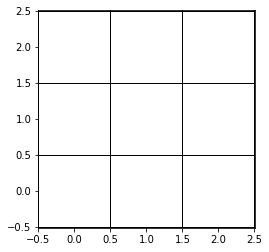

In [10]:
lat = 3 # saves the chosen values
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites

# Particle lambda
x_part = [*range(0,M1+1)] #possible x coordinates
y_part = [*range(0,M1+1)] #possible y coordinates
points_part = [*itertools.product(x_part,y_part)]


# Particle 1
start_part1 = -0.25
stop_part1 = M1
step_part = 1
float_range_array_part1 = np.arange(start_part1, stop_part1, step_part)
x_part1 = list(float_range_array_part1)
y_part = [*range(0,M1+1)] #possible y coordinates
points_part1 = [*itertools.product(x_part1,y_part)] #possible point coordinates
#print(points_part1)
# Particle 2
x_part2 = [*range(0,M1+1)] #possible x coordinates
points_part2 = [*itertools.product(x_part2,y_part)] #possible point coordinates

# Particle 3
start_part3 = 0.25
stop_part3 = M1+1
float_range_array_part3 = np.arange(start_part3, stop_part3, step_part)
x_part3 = list(float_range_array_part3)
points_part3 = [*itertools.product(x_part3,y_part)] #possible point coordinates

points=[points_part2, points_part1, points_part3]

all_configurations_ls=[]
all_totalnum_ls=[]

tryp = [points_part1, points_part3]

''''''#####
P = 2
particles = [*range(0, P)] 
index = 0
while index < P:
    particles[index] = points_part # coordinates of individual particles
    index = index + 1
config_norm = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration
configuration_norm=[]
for elem2 in config_norm:
    l = list(elem2)
    configuration_norm.append(l)
totalnum_norm = len(configuration_norm)
print(configuration_norm)''''''


P=2
particles1 = [*range(0, P)] 
index1 = 0
while index1 < P:
    particles1[index1] = tryp[index1] # coordinates of individual particles
    index1 = index1 + 1
config1 = [p for p in [*itertools.product(*particles1)]] # coordinates of particles in configuration
confignew=[]
for e in config1:
    u = list(e)
    confignew.append(u)
print(confignew)
        #print(t)'''


fi, ax= plt.subplots()

ax.axis('scaled')
ax.axis('off')

def subplot():
    ax.set_xlim(-0.5, M1+0.51)
    ax.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax.axvline(x=xc, color='black', linewidth=1)
        ax.axhline(y=xc, color='black', linewidth=1)

def animaaaaate(frame):
    ax.clear()
    subplot()
    elem2 = configuration_norm[frame]
    colo = ['r', 'b']
    i = 0
    for t2_ls in elem2:
        if not elem2[0] == elem2[1]:
            circle = plt.Circle((t2_ls[0], t2_ls[1]) ,0.1 , color=colo[i])
            ax.add_patch(circle)
        i +=1
        #else:
          #  newx= x_part - 0.25
            
            
            
            # plot particles
            #circle = plt.Circle((t[0], t[1]) ,0.1 , color=colo[i])
            #ax.add_patch(circle) # plot particles
        #else:
            #configuration_norm.index
            #(configuration_norm.index)
            
            
            
            
#for el in confignew:
                #for t in el:
                   # circle = plt.Circle((t[0], t[1]) ,0.1 , color=colo[i])
                  #  ax.add_patch(circle)
            
    #i += 1        

print('The total number of configurations is %d' % totalnum_norm)
animati = animation.FuncAnimation(fi, animaaaaate, frames=totalnum_norm, interval=400)
HTML(animati.to_html5_video())

[[(0, 0), (0, 0)], [(0, 0), (0, 1)], [(0, 0), (0, 2)], [(0, 0), (1, 0)], [(0, 0), (1, 1)], [(0, 0), (1, 2)], [(0, 0), (2, 0)], [(0, 0), (2, 1)], [(0, 0), (2, 2)], [(0, 1), (0, 0)], [(0, 1), (0, 1)], [(0, 1), (0, 2)], [(0, 1), (1, 0)], [(0, 1), (1, 1)], [(0, 1), (1, 2)], [(0, 1), (2, 0)], [(0, 1), (2, 1)], [(0, 1), (2, 2)], [(0, 2), (0, 0)], [(0, 2), (0, 1)], [(0, 2), (0, 2)], [(0, 2), (1, 0)], [(0, 2), (1, 1)], [(0, 2), (1, 2)], [(0, 2), (2, 0)], [(0, 2), (2, 1)], [(0, 2), (2, 2)], [(1, 0), (0, 0)], [(1, 0), (0, 1)], [(1, 0), (0, 2)], [(1, 0), (1, 0)], [(1, 0), (1, 1)], [(1, 0), (1, 2)], [(1, 0), (2, 0)], [(1, 0), (2, 1)], [(1, 0), (2, 2)], [(1, 1), (0, 0)], [(1, 1), (0, 1)], [(1, 1), (0, 2)], [(1, 1), (1, 0)], [(1, 1), (1, 1)], [(1, 1), (1, 2)], [(1, 1), (2, 0)], [(1, 1), (2, 1)], [(1, 1), (2, 2)], [(1, 2), (0, 0)], [(1, 2), (0, 1)], [(1, 2), (0, 2)], [(1, 2), (1, 0)], [(1, 2), (1, 1)], [(1, 2), (1, 2)], [(1, 2), (2, 0)], [(1, 2), (2, 1)], [(1, 2), (2, 2)], [(2, 0), (0, 0)], [(2, 0), 

"######\nfor P in [*range(1,4)]: # consider 1,2,3 particles\n    particles = [*range(0, P)] \n    index = 0\n    while index < P:\n        particles[index] = points[index] # coordinates of individual particles\n        index = index + 1\n    config = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration\n    configuration=[]\n    for elem in config:\n        l = list(elem)\n        configuration.append(l)\n    totalnum = len(configuration)\n    all_configurations_ls.append(configuration)\n    all_totalnum_ls.append(totalnum)\n\nfig1_ls, ax1_ls = plt.subplots()\nfig2_ls, ax2_ls = plt.subplots()\nfig3_ls, ax3_ls = plt.subplots()\n\nax1_ls.axis('scaled')\nax2_ls.axis('scaled')\nax3_ls.axis('scaled')\n\n        \ndef subplot1_ls(): # set up case1\n    ax1_ls.axis('off')\n    ax1_ls.set_xlim(-0.5, M1+0.51)\n    ax1_ls.set_ylim(-0.51, M1+0.51)\n    start = -0.5\n    stop = M1+1\n    step = 1\n    float_range_array = np.arange(start, stop, step)\n    xcoord

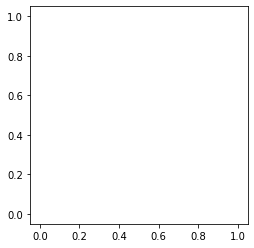

In [12]:

for P in [*range(1,4)]: # consider 1,2,3 particles
    particles = [*range(0, P)] 
    index = 0
    while index < P:
        particles[index] = points[index] # coordinates of individual particles
        index = index + 1
    config = [p for p in [*itertools.product(*particles)]] # coordinates of particles in configuration
    configuration=[]
    for elem in config:
        l = list(elem)
        configuration.append(l)
    totalnum = len(configuration)
    all_configurations_ls.append(configuration)
    all_totalnum_ls.append(totalnum)

fig1_ls, ax1_ls = plt.subplots()
fig2_ls, ax2_ls = plt.subplots()
fig3_ls, ax3_ls = plt.subplots()

ax1_ls.axis('scaled')
ax2_ls.axis('scaled')
ax3_ls.axis('scaled')

        
def subplot1_ls(): # set up case1
    ax1_ls.axis('off')
    ax1_ls.set_xlim(-0.5, M1+0.51)
    ax1_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1_ls.axvline(x=xc, color='black', linewidth=1)
        ax1_ls.axhline(y=xc, color='black', linewidth=1)
    
def subplot2_ls(): # set up case2
    ax2_ls.axis('off')
    ax2_ls.set_xlim(-0.5, M1+0.51)
    ax2_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2_ls.axvline(x=xc, color='black', linewidth=1)
        ax2_ls.axhline(y=xc, color='black', linewidth=1)

def subplot3_ls(): # set up case3
    ax3_ls.axis('off')
    ax3_ls.set_xlim(-0.5, M1+0.51)
    ax3_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3_ls.axvline(x=xc, color='black', linewidth=1)
        ax3_ls.axhline(y=xc, color='black', linewidth=1)


configuration1_ls=all_configurations_ls[0] # possible configurations case1       
configuration2_ls=all_configurations_ls[1] # possible configurations case2 
configuration3_ls=all_configurations_ls[2] # possible configurations case3

not3 =[]
print(configuration3_ls)
for elem3 in configuration3_ls:
    if elem3[0] != elem[1] or elem3[0] != elem[2] or elem3[1] != elem[2]:
        not3.append(elem3)
print(configuration3_ls)

totalnum1_ls=all_totalnum_ls[0] # multiplicity case1
totalnum2_ls=all_totalnum_ls[1] # multiplicity case2
totalnum3_ls=all_totalnum_ls[2] # multiplicity case3


def animate1_ls(frame):
    ax1_ls.clear()
    subplot1_ls()
    elem1 = configuration1_ls[frame]
    v = 0
    for t1_ls in elem1:
        colo = ['b', 'r']
        circle = plt.Circle((t1_ls[0], t1_ls[1]) ,0.1 , color=colo[v])
        ax1_ls.add_patch(circle) # plot particles
        v += 1
def animate2_ls(frame):       
    ax2_ls.clear()
    subplot2_ls()
    elem2 = configuration2_ls[frame]
    print(elem2)
    i = 0
    for t2_ls in elem2:
        colo = ['b', 'r']
        circle = plt.Circle((t2_ls[0], t2_ls[1]) ,0.1 , color=colo[i])
        ax2_ls.add_patch(circle) # plot particles
        i += 1
def animate3_ls(frame):        
    ax3_ls.clear()
    subplot3_ls()
    elem3 = configuration3_ls[frame]
    j = 0
    for t3_ls in elem3:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        ax3_ls.add_patch(circle) # plot particles
        j += 1
'''
#print('The total number of configurations is %d' % totalnum1_ls)
#animation1_ls = animation.FuncAnimation(fig1_ls, animate1_ls, frames=totalnum1_ls, interval=400)
#HTML(animation1_ls.to_html5_video(1))

#print('The total number of configurations is %d' % totalnum2_ls)
#animation2_ls = animation.FuncAnimation(fig2_ls, animate2_ls, frames=totalnum2_ls, interval=400)
#HTML(animation2_ls.to_html5_video())

In [48]:
print('The total number of configurations is %d' % totalnum3_ls)
animation3_ls = animation.FuncAnimation(fig3_ls, animate3_ls, frames=totalnum3_ls, interval=200)
HTML(animation3_ls.to_html5_video())

The total number of configurations is 729
